In [9]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [14]:
#data on the collection of conformers for each ligand in the library
#data transcribed from csv file
conformer_count_data = [["1",1098217],["2",3316360],["3",2939541],["4",7790732],["5",3494386],["6",16040424],["7",9875275],["8",45436202],["9",49187282],["10",107007723],["11",163997069],["12",391710978],["13",437704066],["14",662524758],["15",739231507]]

#convert to dataframe
df = pd.DataFrame(conformer_count_data, columns=['X', 'Y'])

In [15]:
#derive the total number of ligands
total_ligands = 0
for pair in conformer_count_data:
    total_ligands = pair[1] + total_ligands
    
print("Total ligands", total_ligands)

Total ligands 2641354520


In [18]:
#derive total number of conformers (lig count * conf number)
total_confs = 0
for pair in conformer_count_data:
    total_confs = (int(pair[0]) * pair[1]) + total_confs
    
print("Total conformers", total_confs)

Total conformers 34665277841


In [16]:
total_ligands_str = "2,641,354,520"

In [20]:
total_conf_str = "34,665,277,841"

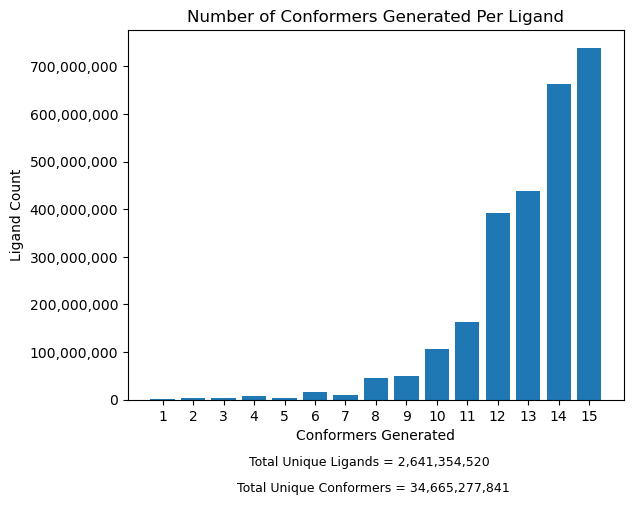

In [25]:
# Create a bar plot
plt.bar(df['X'], df['Y'])
plt.xlabel('Conformers Generated')
plt.ylabel('Ligand Count')
plt.title('Number of Conformers Generated Per Ligand')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))

# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#add note for the text
#plt.text(3, 1, "Conformers: " + str(total_ligands), fontsize=12, color='black')
plt.annotate("Total Unique Ligands = " + str(total_ligands_str), xy=(0.245, -0.18), xycoords='axes fraction', fontsize=9, color='black')
plt.annotate("Total Unique Conformers = " + str(total_conf_str), xy=(0.22, -0.25), xycoords='axes fraction', fontsize=9, color='black')

plt.show()

In [36]:
#read in the conformer per chunk data sheet
df = pd.read_csv("conformer_library_data/average_conformers_per_chunk.csv")

#remove the 0 values
df = df[df['Average_Conformers_Generated'] >= 0.5]

In [37]:
df

,Chunk,Average_Conformers_Generated
0,0,12.709817
1,1,12.725462
2,2,12.729911
3,3,12.728422
4,4,12.736158
...,...,...
53080,53080,13.294173
53081,53081,13.294584
53082,53082,13.285202
53083,53083,13.281701


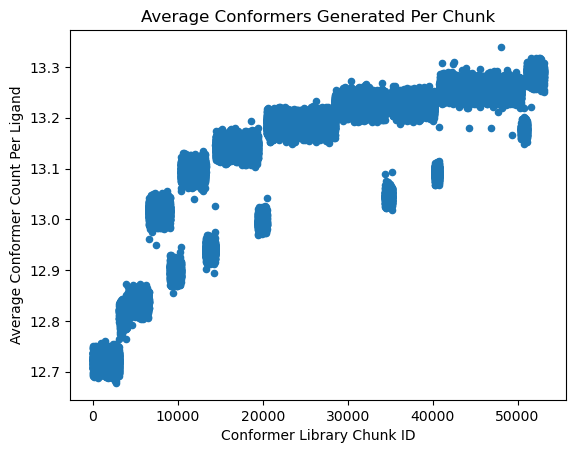

In [44]:
df.plot(kind='scatter',x='Chunk',y='Average_Conformers_Generated')

plt.xlabel('Conformer Library Chunk ID')
plt.ylabel('Average Conformer Count Per Ligand')
plt.title('Average Conformers Generated Per Chunk')

#plt.ylim(0,15)

plt.show()

In [50]:
#read in mw count sheet
df = pd.read_csv("conformer_library_data/all_mw_count.csv")

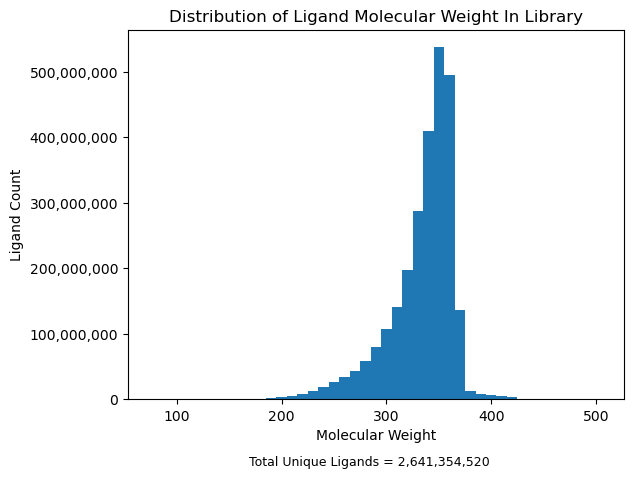

In [55]:
# Create a bar plot
plt.bar(df['Molecular_Weight_(amu)'], df['Ligands'], width = 10)
plt.xlabel('Molecular Weight')
plt.ylabel('Ligand Count')
plt.title('Distribution of Ligand Molecular Weight In Library')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))

# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#add note for the text
#plt.text(3, 1, "Conformers: " + str(total_ligands), fontsize=12, color='black')
plt.annotate("Total Unique Ligands = " + str(total_ligands_str), xy=(0.245, -0.18), xycoords='axes fraction', fontsize=9, color='black')

plt.show()

In [57]:
#read in the average mw per chunk csv
df = pd.read_csv("conformer_library_data/average_mw_per_chunk.csv")

#remove the 0 values
df = df[df['Average_Molecular_Weight_(amu)'] >= 0.5]

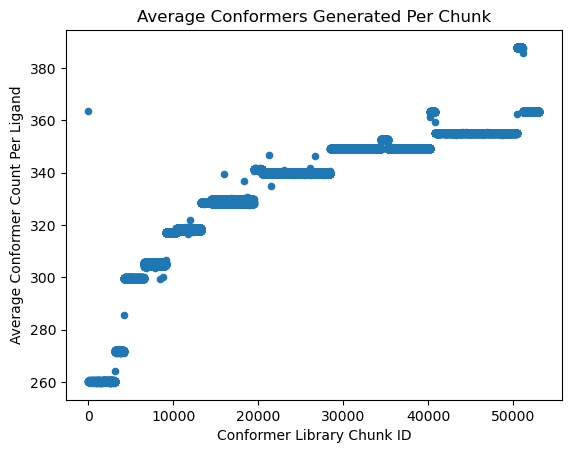

In [59]:
df.plot(kind='scatter',x='Chunk',y='Average_Molecular_Weight_(amu)')

plt.xlabel('Conformer Library Chunk ID')
plt.ylabel('Average Conformer Count Per Ligand')
plt.title('Average Conformers Generated Per Chunk')

#plt.ylim(0,15)

plt.show()

In [65]:
#read in mw count sheet
df = pd.read_csv("conformer_library_data/all_elements_count.csv")

In [78]:
#derive the total number of atoms
total_atoms = 0
for pair in df['Total_Count']:
    print(pair)
    total_atoms = pair + total_atoms
    
print("Total atoms", total_atoms)

48801545038
9205877232
7608842515
616729814
1427194395
230750537
53420857
211594
Total atoms 67944571982


In [79]:
total_atoms = "67,944,571,982"

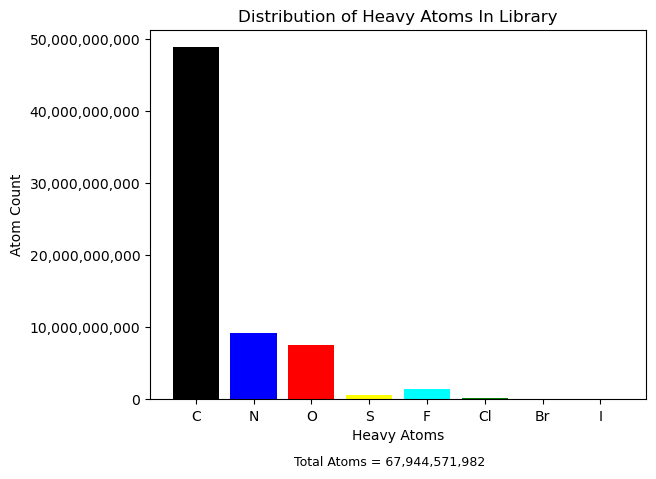

In [82]:
#set colors in the order that the elements appear
colors = ["black", "blue", "red", "yellow", "cyan", "green", "brown", "purple"]

# Create a bar plot
plt.bar(df['Element'], df['Total_Count'],color=colors)
plt.xlabel('Heavy Atoms')
plt.ylabel('Atom Count')
plt.title('Distribution of Heavy Atoms In Library')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))

# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#add note for the text
#plt.text(3, 1, "Conformers: " + str(total_ligands), fontsize=12, color='black')
plt.annotate("Total Atoms = " + str(total_atoms), xy=(0.29, -0.18), xycoords='axes fraction', fontsize=9, color='black')

plt.show()